In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib.legend as mlegend

from sklearn.metrics import roc_auc_score

In [2]:
model_path = "/dtu/p1/johlau/LabelReliability_and_PathologyDetection_in_ChestXrays/ObjectDetection/models/"
model_histories = {i:pd.read_json(model_path + i) for i in os.listdir("models") if i.endswith("50.json")}
model_histories.keys()

dict_keys(['mt_history_gamma_0.6_epochs_50.json', 'mt_aug_history_gamma_0.2_epochs_50.json', 'mt_aug_history_gamma_0.6_epochs_50.json', 'mt_history_gamma_0.2_epochs_50.json', 'mt_history_gamma_0.8_epochs_50.json', 'mt_aug_history_gamma_0.8_epochs_50.json', 'mt_aug_history_gamma_0.4_epochs_50.json', 'pd_aug_history_epochs_50.json', 'td_aug_history_epochs_50.json', 'mt_aug_history_gamma_0.5_epochs_50.json', 'mt_history_gamma_0.4_epochs_50.json', 'pd_history_epochs_50.json', 'td_history_epochs_50.json', 'mt_history_gamma_0.5_epochs_50.json'])

In [3]:
mt_names = [
    'mt_history_gamma_0.2_epochs_50.json',
    'mt_history_gamma_0.4_epochs_50.json',
    'mt_history_gamma_0.5_epochs_50.json',
    'mt_history_gamma_0.6_epochs_50.json',
    'mt_history_gamma_0.8_epochs_50.json'
]

mt_aug_names = [
    'mt_aug_history_gamma_0.2_epochs_50.json',
    'mt_aug_history_gamma_0.4_epochs_50.json',
    'mt_aug_history_gamma_0.5_epochs_50.json',
    'mt_aug_history_gamma_0.6_epochs_50.json',
    'mt_aug_history_gamma_0.8_epochs_50.json'
]

pt_td = [
    'pd_history_epochs_50.json', 
    'td_history_epochs_50.json'
]

pt_td_aug = [
    'pd_aug_history_epochs_50.json', 
    'td_aug_history_epochs_50.json'
]

# Training and validation results

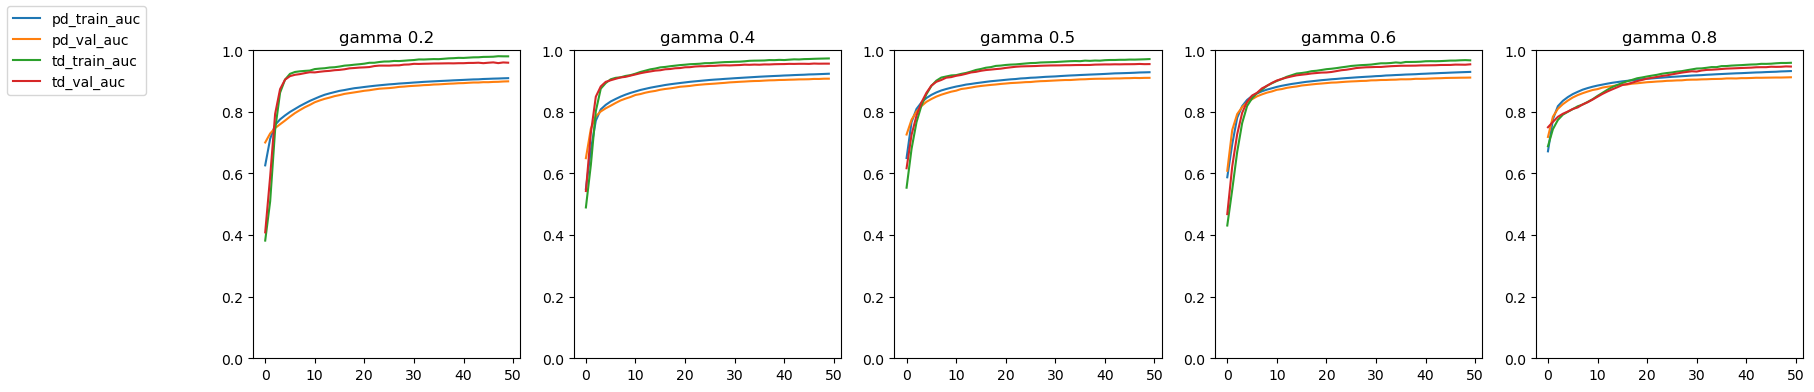

In [4]:
fig, axs = plt.subplots(1, len(mt_names), figsize=(20, 4))

for i in range(len(mt_names)):
    axs[i].plot(model_histories[mt_names[i]]["PD_output_auc"])
    axs[i].plot(model_histories[mt_names[i]]["val_PD_output_auc"])
    axs[i].plot(model_histories[mt_names[i]]["TD_output_auc"])
    axs[i].plot(model_histories[mt_names[i]]["val_TD_output_auc"])
    axs[i].set_ylim(0,1)
    axs[i].set_title("gamma " + mt_names[i].split("gamma_")[1][:3])



labels=["pd_train_auc","pd_val_auc","td_train_auc","td_val_auc"]

#handles, labels = axs[-1].get_legend_handles_labels()
legend = fig.legend(labels, loc="upper left")


plt.show()

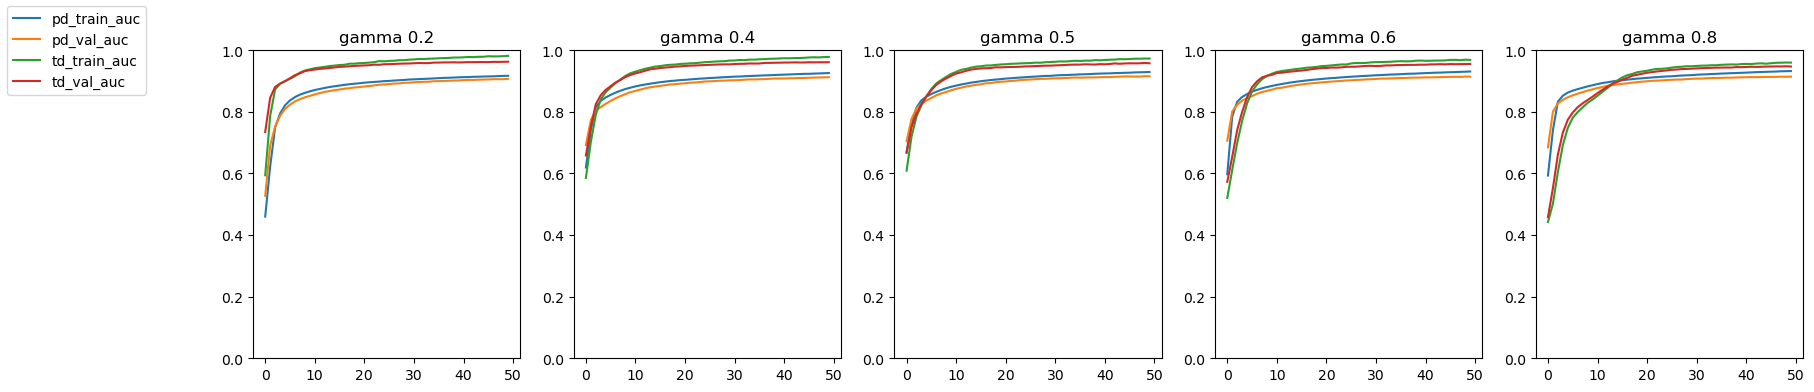

In [5]:
fig, axs = plt.subplots(1, len(mt_aug_names), figsize=(20, 4))

for i in range(len(mt_aug_names)):
    axs[i].plot(model_histories[mt_aug_names[i]]["PD_output_auc"])
    axs[i].plot(model_histories[mt_aug_names[i]]["val_PD_output_auc"])
    axs[i].plot(model_histories[mt_aug_names[i]]["TD_output_auc"])
    axs[i].plot(model_histories[mt_aug_names[i]]["val_TD_output_auc"])
    axs[i].set_ylim(0,1)
    axs[i].set_title("gamma " + mt_aug_names[i].split("gamma_")[1][:3])
  #  axs[i].legend(labels=["pd_train_auc","pd_val_auc","td_train_auc","td_val_auc"])



labels=["pd_train_auc","pd_val_auc","td_train_auc","td_val_auc"]

#handles, labels = axs[-1].get_legend_handles_labels()
legend = fig.legend(labels, loc="upper left")



plt.show()

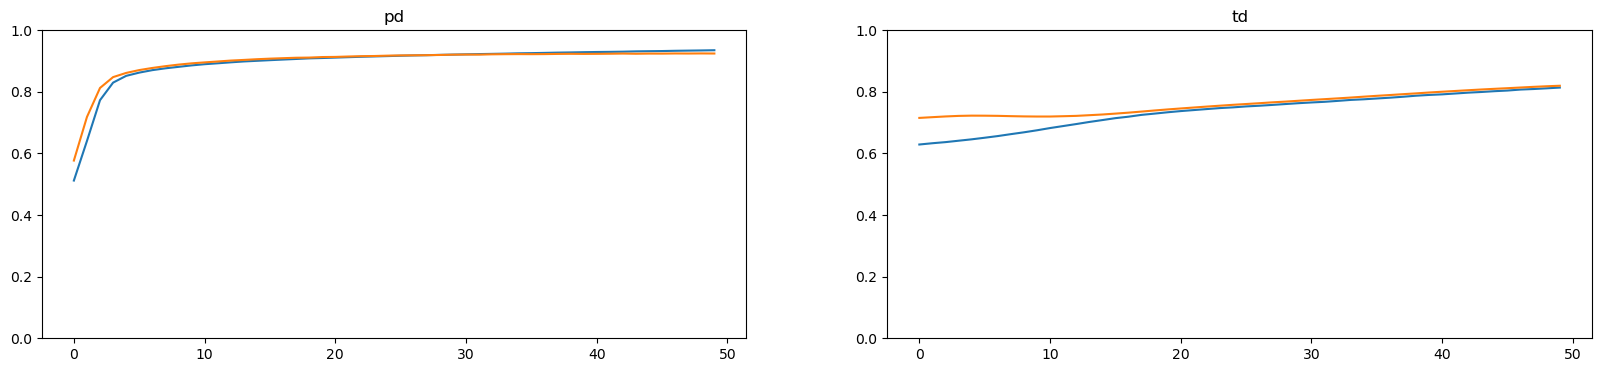

In [6]:
fig, axs = plt.subplots(1, len(pt_td), figsize=(20, 4))

for i in range(len(pt_td)):
    axs[i].plot(model_histories[pt_td[i]]["auc"])
    axs[i].plot(model_histories[pt_td[i]]["val_auc"])
    axs[i].set_ylim(0,1)
    axs[i].set_title( pt_td[i].split("_")[0])
plt.show()

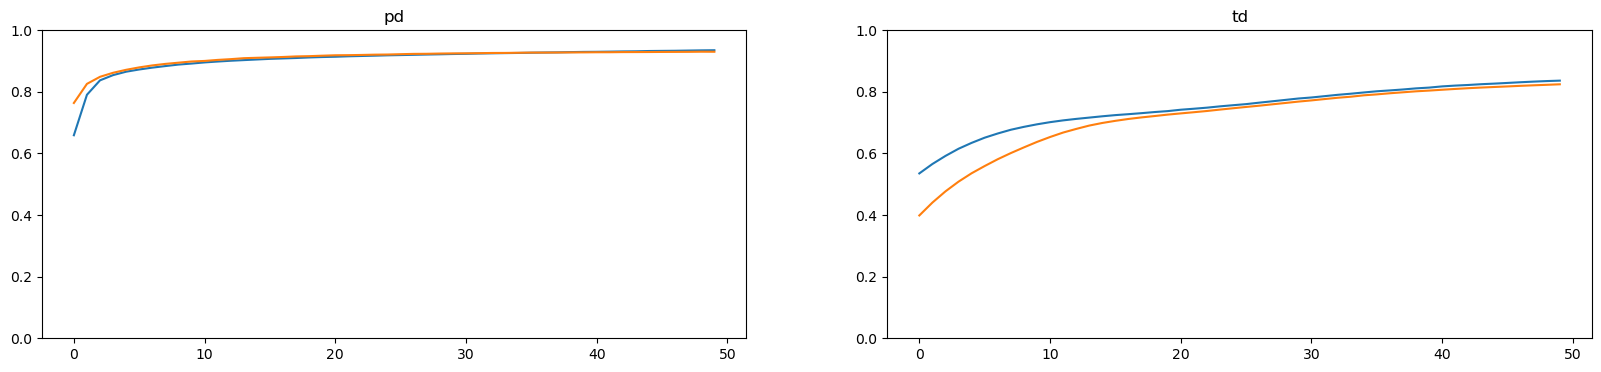

In [7]:
fig, axs = plt.subplots(1, len(pt_td_aug), figsize=(20, 4))

for i in range(len(pt_td)):
    axs[i].plot(model_histories[pt_td_aug[i]]["auc"])
    axs[i].plot(model_histories[pt_td_aug[i]]["val_auc"])
    axs[i].set_ylim(0,1)
    axs[i].set_title( pt_td_aug[i].split("_")[0])
plt.show()

# Test results

In [8]:
results_dir = "/dtu/p1/johlau/LabelReliability_and_PathologyDetection_in_ChestXrays/ObjectDetection/predictions/"
data_dir = "/dtu/p1/johlau/LabelReliability_and_PathologyDetection_in_ChestXrays/"
result_names = os.listdir("/dtu/p1/johlau/LabelReliability_and_PathologyDetection_in_ChestXrays/ObjectDetection/predictions")

In [9]:
pathology_detection_test = pd.read_csv(data_dir + 'Data/Data_splits/pathology_detection-test.csv', index_col=0)


tube_detection_test = pd.read_csv("/dtu/p1/johlau/LabelReliability_and_PathologyDetection_in_ChestXrays/" + "Annotation/Annotations_aggregated.csv", index_col=0)
tube_detection_test = tube_detection_test.rename({"Chest_drain":"Chest_drain_tube"},axis=1)
tube_detection_test["ImagePath"] = tube_detection_test["ImagePath"].apply(lambda x: x.replace("../../", data_dir))
tube_detection_test = tube_detection_test.replace({-1:0})

In [10]:
pathology_detection_test

,ImageID,ImagePath,Labels,Effusion,Pneumothorax,Atelectasis,Cardiomegaly,Pneumonia,Chest_drain_tube,NSG_tube,Endotracheal_tube,Tracheostomy_tube
0,122000277774965864047324735331704213150_58hj8t...,/home/data_shares/purrlab_students/padchest-pr...,"['hemidiaphragm elevation', 'azygos lobe']",0,0,0,0,0,0,0,0,0
1,323329299430220123499459743740529233555_8lonth...,/home/data_shares/purrlab_students/padchest-pr...,"['costophrenic angle blunting', 'interstitial ...",0,0,0,0,0,0,0,0,0
2,216840111366964013451228379692012255095015356_...,/home/data_shares/purrlab_students/padchest-pr...,['normal'],0,0,0,0,0,0,0,0,0
3,215901993415805092612284930988632096429_2rbjm0...,/home/data_shares/purrlab_students/padchest-pr...,['callus rib fracture'],0,0,0,0,0,0,0,0,0
4,216840111366964013686042548532013283151248574_...,/home/data_shares/purrlab_students/padchest-pr...,"['pacemaker', 'dual chamber device']",0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9784,216840111366964012373310883942009152114440525_...,/home/data_shares/purrlab_students/padchest-pr...,['normal'],0,0,0,0,0,0,0,0,0
9785,216840111366964012922382741642011011084257538_...,/home/data_shares/purrlab_students/padchest-pr...,"['pleural effusion', 'atelectasis']",1,0,1,0,0,0,0,0,0
9786,216840111366964013340662495472012124102633950_...,/home/data_shares/purrlab_students/padchest-pr...,['normal'],0,0,0,0,0,0,0,0,0
9787,263194312664368739577287449640129198627_anu1co...,/home/data_shares/purrlab_students/padchest-pr...,['normal'],0,0,0,0,0,0,0,0,0


In [11]:
pd_labels = ['Effusion', 'Pneumothorax', 'Atelectasis', 'Cardiomegaly', 'Pneumonia']
td_labels = ['Chest_drain_tube', 'NSG_tube', 'Endotracheal_tube', 'Tracheostomy_tube']

In [12]:
pd_true = pathology_detection_test[pd_labels]
pd_true

,Effusion,Pneumothorax,Atelectasis,Cardiomegaly,Pneumonia
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
9784,0,0,0,0,0
9785,1,0,1,0,0
9786,0,0,0,0,0
9787,0,0,0,0,0


In [13]:
td_true = tube_detection_test[td_labels]
td_true

,Chest_drain_tube,NSG_tube,Endotracheal_tube,Tracheostomy_tube
0,0,0,0,1
1,0,0,0,0
2,0,1,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1006,1,0,0,0
1007,1,0,0,0
1008,0,0,0,0
1009,1,0,0,0


In [14]:
#pd_result_names = [i for i in result_names if i.startswith("pd") and i.endswith("50.json")]
#td_result_names = [i for i in result_names if i.startswith("td") and i.endswith("50.json")]

pd_result_names=[
    'pd_mt_gamma_0.8_epochs_50.json',
    'pd_mt_aug_gamma_0.8_epochs_50.json',
    'pd_epochs_50.json',
    'pd_aug_epochs_50.json',
]

td_result_names=[
    'td_mt_gamma_0.2_epochs_50.json',
    'td_mt_aug_gamma_0.2_epochs_50.json',
    'td_epochs_50.json',
    'td_aug_epochs_50.json',
]

In [15]:
pd_preds = {i:pd.read_json(results_dir+i) for i in pd_result_names}
td_preds = {i:pd.read_json(results_dir+i) for i in td_result_names}

In [16]:
roc_auc_score(pd_true,pd_preds[pd_result_names[0]], average=None)

array([0.94844668, 0.77713555, 0.85280131, 0.89691984, 0.81201078])

In [17]:
pd_results = list()
labels = pd_labels
labels.append("name")
for name in pd_result_names:

    auc_score = list(roc_auc_score(pd_true,pd_preds[name], average=None))

    auc_score.append(name)
    output = pd.DataFrame([auc_score], columns=labels)
    pd_results.append(output)


    
pd_results_df = pd.concat(pd_results)

In [21]:
print(pd_results_df.to_latex())

\begin{tabular}{lrrrrrl}
\toprule
 & Effusion & Pneumothorax & Atelectasis & Cardiomegaly & Pneumonia & name \\
\midrule
0 & 0.948447 & 0.777136 & 0.852801 & 0.896920 & 0.812011 & pd_mt_gamma_0.8_epochs_50.json \\
0 & 0.953176 & 0.796105 & 0.864568 & 0.907105 & 0.817440 & pd_mt_aug_gamma_0.8_epochs_50.json \\
0 & 0.946844 & 0.755828 & 0.864331 & 0.897843 & 0.809098 & pd_epochs_50.json \\
0 & 0.948980 & 0.641535 & 0.855135 & 0.906668 & 0.819693 & pd_aug_epochs_50.json \\
\bottomrule
\end{tabular}



In [19]:
td_results = list()
labels = td_labels
labels.append("name")
for name in td_result_names:

    auc_score = list(roc_auc_score(td_true,td_preds[name], average=None))

    auc_score.append(name)
    output = pd.DataFrame([auc_score], columns=labels)
    td_results.append(output)


    
td_results_df = pd.concat(td_results)

In [20]:
td_results_df

,Chest_drain_tube,NSG_tube,Endotracheal_tube,Tracheostomy_tube,name
0,0.317720,0.661987,0.653020,0.598443,td_mt_gamma_0.2_epochs_50.json
0,0.388618,0.679178,0.682255,0.721924,td_mt_aug_gamma_0.2_epochs_50.json
0,0.737999,0.542382,0.579912,0.571387,td_epochs_50.json
0,0.709057,0.563239,0.543879,0.637556,td_aug_epochs_50.json


In [22]:
print(td_results_df.to_latex())

\begin{tabular}{lrrrrl}
\toprule
 & Chest_drain_tube & NSG_tube & Endotracheal_tube & Tracheostomy_tube & name \\
\midrule
0 & 0.317720 & 0.661987 & 0.653020 & 0.598443 & td_mt_gamma_0.2_epochs_50.json \\
0 & 0.388618 & 0.679178 & 0.682255 & 0.721924 & td_mt_aug_gamma_0.2_epochs_50.json \\
0 & 0.737999 & 0.542382 & 0.579912 & 0.571387 & td_epochs_50.json \\
0 & 0.709057 & 0.563239 & 0.543879 & 0.637556 & td_aug_epochs_50.json \\
\bottomrule
\end{tabular}

